In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define a non-stationary bandit environment
class NonStationaryBandit:
    def __init__(self, k, decay=0.99):
        self.k = k  # Number of arms
        self.true_probabilities = np.random.rand(k)
        self.decay = decay  # Rate at which probabilities change

    def step(self):
        # Reward is Bernoulli distributed
        rewards = (np.random.rand(self.k) < self.true_probabilities).astype(float)
        # Slowly change the reward probabilities
        self.true_probabilities = self.true_probabilities * self.decay + (1 - self.decay) * np.random.rand(self.k)
        return rewards


In [3]:
# Epsilon-Greedy Strategy
class EpsilonGreedy:
    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.counts = np.zeros(k)
        self.q_values = np.zeros(k)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.q_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm]) / self.counts[arm]


In [4]:
# Upper Confidence Bound (UCB) Strategy
class UCB:
    def __init__(self, k, c=2):
        self.k = k
        self.counts = np.zeros(k)
        self.q_values = np.zeros(k)
        self.total_count = 0
        self.c = c

    def select_arm(self):
        self.total_count += 1
        ucb_values = self.q_values + self.c * np.sqrt(np.log(self.total_count) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.q_values[arm] += (reward - self.q_values[arm]) / self.counts[arm]



In [5]:
# Thompson Sampling Strategy
class ThompsonSampling:
    def __init__(self, k):
        self.k = k
        self.successes = np.zeros(k)
        self.failures = np.zeros(k)

    def select_arm(self):
        beta_samples = [np.random.beta(self.successes[i] + 1, self.failures[i] + 1) for i in range(self.k)]
        return np.argmax(beta_samples)

    def update(self, arm, reward):
        if reward == 1:
            self.successes[arm] += 1
        else:
            self.failures[arm] += 1

In [6]:
# Experiment parameters
k = 10  # Number of arms
steps = 5000
env = NonStationaryBandit(k)

epsilon_greedy = EpsilonGreedy(k)
ucb = UCB(k)
thompson_sampling = ThompsonSampling(k)

strategies = [epsilon_greedy, ucb, thompson_sampling]
strategy_names = ['Epsilon-Greedy', 'UCB', 'Thompson Sampling']

In [7]:
# Tracking rewards
rewards = np.zeros((3, steps))

# Run the simulation
for t in range(steps):
    reward_vector = env.step()
    for i, strategy in enumerate(strategies):
        arm = strategy.select_arm()
        reward = reward_vector[arm]
        strategy.update(arm, reward)
        rewards[i, t] = reward



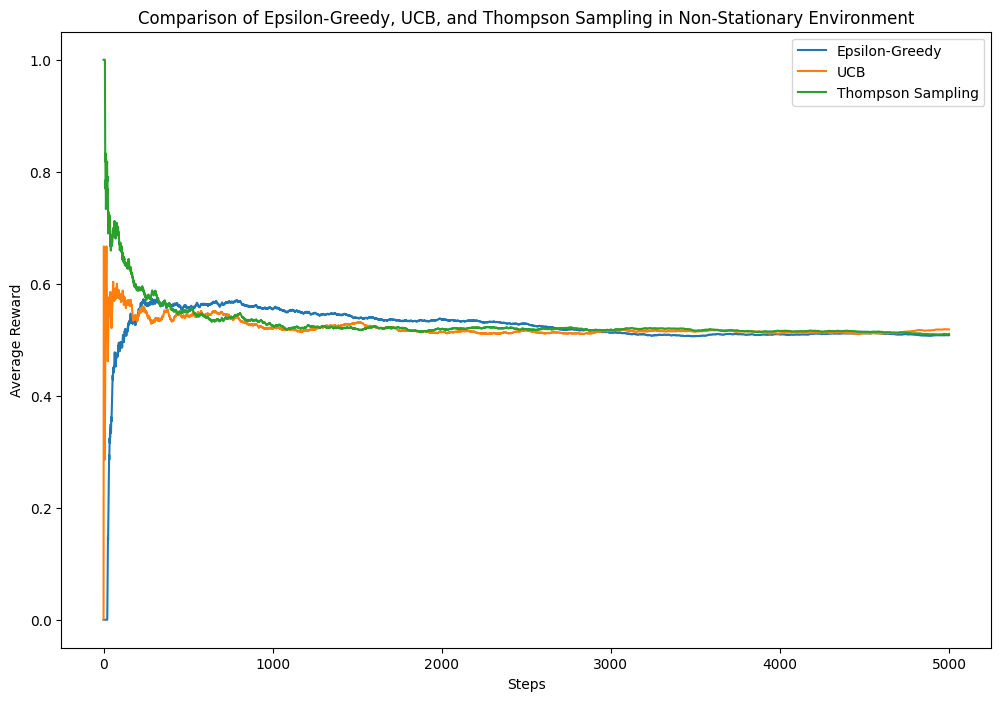

In [8]:
# Plot the results
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.plot(np.cumsum(rewards[i]) / (np.arange(steps) + 1), label=strategy_names[i])

plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Comparison of Epsilon-Greedy, UCB, and Thompson Sampling in Non-Stationary Environment')
plt.legend()
plt.show()